In [1]:
import pandas as pd
journal_entries = pd.read_excel("Vinatics 2019 Journal Entries.xlsx")
journal_entries.head()

,JE Number,GL Code,Period,Effective Date,Entry Date,Source,Source Group,Functional Amount,Preparer
0,210000003,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-302887.20000,Merrie Beaver
1,210000003,60000113,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,250320.00000,Merrie Beaver
2,210000003,20001102,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,52567.20000,Merrie Beaver
3,210000006,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-11708.75376,Merrie Beaver
4,210000006,60000112,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,9676.65600,Merrie Beaver


In [2]:
journal_entries_copy = journal_entries.copy()
journal_entries_copy = journal_entries_copy[['GL Code','Source','Entry Date','Functional Amount']]
journal_entries_copy['Month'] = journal_entries_copy['Entry Date'].dt.month_name()
journal_entries_copy.head()

,GL Code,Source,Entry Date,Functional Amount,Month
0,60000001,Invoice,2019-01-21,-302887.20000,January
1,60000113,Invoice,2019-01-21,250320.00000,January
2,20001102,Invoice,2019-01-21,52567.20000,January
3,60000001,Invoice,2019-01-21,-11708.75376,January
4,60000112,Invoice,2019-01-21,9676.65600,January


In [3]:
chart_of_account = pd.read_excel("Vinatics Chart of Accounts.xlsx")
chart_of_account.head()

,Account Number,Account Type,Class,Sub class,Account Name,Unnamed: 5,Unnamed: 6
0,20000050,Assets,Receivables,Trade receivables,Customer invoices,NaN,NaN
1,20000051,Assets,Receivables,Trade receivables,Credit notes,NaN,NaN
2,20000000,Assets,Receivables,Trade receivables,Receivables 1,NaN,NaN
3,20000021,Assets,Receivables,Trade receivables,Receivables 2,NaN,NaN
4,20000002,Assets,Receivables,Trade receivables,Receivables 3,NaN,NaN


In [4]:
chart_of_account = chart_of_account.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
chart_of_account.head()

,Account Number,Account Type,Class,Sub class,Account Name
0,20000050,Assets,Receivables,Trade receivables,Customer invoices
1,20000051,Assets,Receivables,Trade receivables,Credit notes
2,20000000,Assets,Receivables,Trade receivables,Receivables 1
3,20000021,Assets,Receivables,Trade receivables,Receivables 2
4,20000002,Assets,Receivables,Trade receivables,Receivables 3


In [5]:
journal_entries_copy = journal_entries_copy.merge(chart_of_account, how = 'outer', left_on='GL Code', right_on='Account Number').drop(['GL Code','Account Number','Entry Date','Account Name','Sub class'], axis = 1)
journal_entries_copy.head()

,Source,Functional Amount,Month,Account Type,Class
0,Invoice,-302887.20000,January,Liabilities,Payables
1,Invoice,-11708.75376,January,Liabilities,Payables
2,Invoice,-3758.66208,January,Liabilities,Payables
3,Invoice,-18907.95696,January,Liabilities,Payables
4,Invoice,-17307.84000,January,Liabilities,Payables


In [6]:
revenue = journal_entries_copy[journal_entries_copy['Account Type'] == 'Revenue']
expenses = journal_entries_copy[journal_entries_copy['Account Type'] == 'Expenses']

In [7]:
import matplotlib.pyplot as plt

In [8]:
revenue_chart = revenue.copy()
revenue_chart = revenue_chart[revenue_chart['Class'] == 'Revenue from contract with customers']
revenue_chart = revenue_chart.drop('Source', axis=1)
revenue_chart['Functional Amount'] *= -1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

revenue_chart['Month'] = pd.Categorical(revenue_chart['Month'], categories=months, ordered=True)
revenue_chart = revenue_chart.groupby(by = ['Month']).sum()
revenue_chart.rename(columns = {'Functional Amount':'Revenue'}, inplace=True)
revenue_chart.head()

,Revenue
Month,
January,1.673393e+08
February,1.598645e+08
March,1.286180e+08
April,1.296631e+08
May,1.421999e+08


In [9]:
expenses_chart = expenses.copy()
expenses_chart = expenses_chart[expenses_chart['Class'] == 'Cost of sales']
expenses_chart = expenses_chart.drop('Source', axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

expenses_chart['Month'] = pd.Categorical(expenses_chart['Month'], categories=months, ordered=True)

expenses_chart = expenses_chart.groupby(by = ['Month']).sum()
expenses_chart.rename(columns = {'Functional Amount':'Cost of Sales'}, inplace=True)
expenses_chart.head()

,Cost of Sales
Month,
January,1.419600e+08
February,2.522447e+07
March,4.043989e+07
April,6.385498e+07
May,6.021648e+07


In [10]:
gp = pd.merge(revenue_chart, expenses_chart, on='Month')
gp

,Revenue,Cost of Sales
Month,,
January,1.673393e+08,1.419600e+08
February,1.598645e+08,2.522447e+07
March,1.286180e+08,4.043989e+07
April,1.296631e+08,6.385498e+07
May,1.421999e+08,6.021648e+07
June,1.492517e+08,3.848560e+07
July,1.079696e+08,8.702008e+07
August,1.105862e+08,5.466061e+07
September,1.653530e+08,4.671700e+07


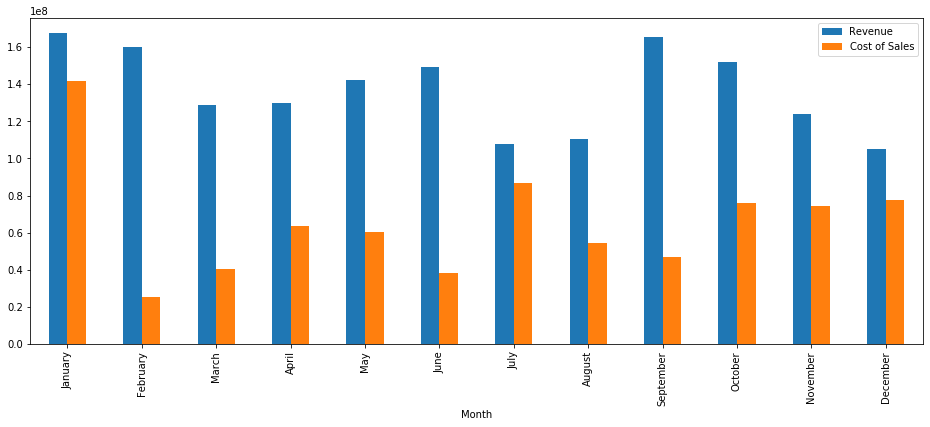

In [11]:
gp.plot.bar(figsize=(16,6))

In [12]:
gp2 = gp.copy()
gp2['Gross Profit'] = gp2['Revenue'] - gp2['Cost of Sales']
gp2['Gross Profit Margin'] = gp2['Gross Profit']/gp2['Revenue']*100
gp2

,Revenue,Cost of Sales,Gross Profit,Gross Profit Margin
Month,,,,
January,1.673393e+08,1.419600e+08,2.537931e+07,15.166381
February,1.598645e+08,2.522447e+07,1.346400e+08,84.221342
March,1.286180e+08,4.043989e+07,8.817811e+07,68.558138
April,1.296631e+08,6.385498e+07,6.580817e+07,50.753176
May,1.421999e+08,6.021648e+07,8.198342e+07,57.653639
June,1.492517e+08,3.848560e+07,1.107661e+08,74.214306
July,1.079696e+08,8.702008e+07,2.094953e+07,19.403174
August,1.105862e+08,5.466061e+07,5.592556e+07,50.571928
September,1.653530e+08,4.671700e+07,1.186360e+08,71.747113


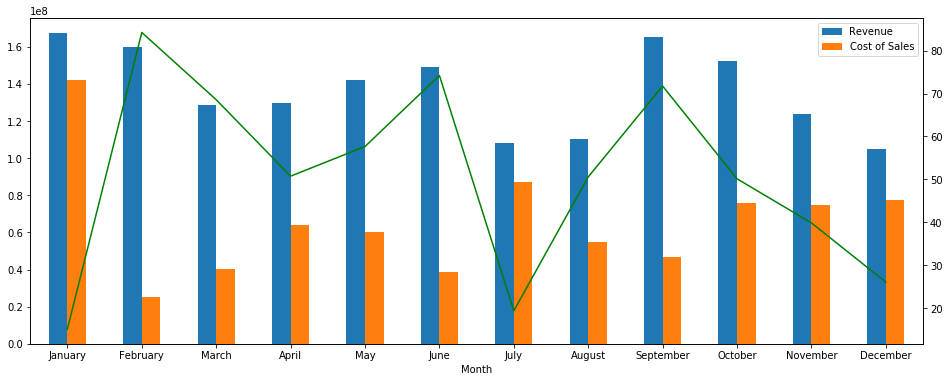

In [14]:
gp.plot.bar(figsize=(16,6))
gp2['Gross Profit Margin'].plot(secondary_y=True, color = 'green')
width = .5
# ax = plt.gca()
plt.xlim([-width, len(gp['Revenue'])-width])

plt.show()

In [19]:
1.049408e+08/100000000

1.049408